In [12]:
from rdkit import Chem
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import sys
sys.path.append('../')
sys.path.append('../data_processing/')

In [2]:
from data_processing.ligand import Ligand
from evaluation.utils_eval import build_pdb_dict

In [3]:
root = '/home/conghao001/pharmacophore2drug/PP2Drug/data/cleaned_crossdocked_data/raw'
pdb_dict, pdb_rev_dict = build_pdb_dict(root)

In [4]:
ligand_fn = '4kux_B_rec_4kvw_jf4_lig_tt_min_0.sdf'
path = os.path.join(root, pdb_rev_dict[ligand_fn], ligand_fn)

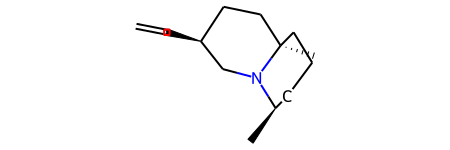

In [5]:
rdmol = Chem.MolFromMolFile(path, removeHs=False, sanitize=True)
rdmol

In [6]:
conf = rdmol.GetConformer()
for bond in rdmol.GetBonds():
    begin_idx = bond.GetBeginAtomIdx()  # Index of the first atom in the bond
    end_idx = bond.GetEndAtomIdx()  # Index of the second atom in the bond
    
    # Get the 3D coordinates of the atoms
    begin_pos = conf.GetAtomPosition(begin_idx)
    end_pos = conf.GetAtomPosition(end_idx)
    
    # Calculate the bond length
    bond_length = begin_pos.Distance(end_pos)
    print(f"Bond between atom {begin_idx} and atom {end_idx}: Length = {bond_length:.4f} Å")

Bond between atom 0 and atom 1: Length = 1.5182 Å
Bond between atom 0 and atom 6: Length = 1.5203 Å
Bond between atom 0 and atom 13: Length = 1.4922 Å
Bond between atom 1 and atom 2: Length = 1.5210 Å
Bond between atom 2 and atom 3: Length = 1.5213 Å
Bond between atom 3 and atom 4: Length = 1.5220 Å
Bond between atom 3 and atom 5: Length = 1.4805 Å
Bond between atom 3 and atom 7: Length = 1.5267 Å
Bond between atom 5 and atom 10: Length = 1.4799 Å
Bond between atom 5 and atom 6: Length = 1.4750 Å
Bond between atom 7 and atom 8: Length = 1.5239 Å
Bond between atom 8 and atom 9: Length = 1.5225 Å
Bond between atom 9 and atom 10: Length = 1.5258 Å
Bond between atom 10 and atom 11: Length = 1.5227 Å
Bond between atom 12 and atom 13: Length = 1.3199 Å
Bond between atom 13 and atom 14: Length = 1.4999 Å


In [7]:
rdmol.GetNumBonds()

16

In [8]:
begin_pos

In [9]:
# verify an example
atom_positions = conf.GetPositions()
print(np.sqrt(sum((atom_positions[0] - atom_positions[6])**2)))
np.linalg.norm(atom_positions[0] - atom_positions[6])

1.5202829637932536


1.5202829637932538

In [15]:
bond_len_list = []
for folder in tqdm(os.listdir(root)):
    folder_path = os.path.join(root, folder)
    if not os.path.isdir(folder_path):
        continue
    for file in os.listdir(folder_path):
        if not file.endswith('.sdf'):
            continue
        file_path = os.path.join(folder_path, file)
        # print(file_path)
        mol = Chem.MolFromMolFile(file_path, removeHs=False, sanitize=True)
        if mol is None:
            continue
        if mol.GetNumBonds()==0 or mol.GetNumAtoms()==0:
            continue
        conf = mol.GetConformer()
        atom_positions = conf.GetPositions()

        acc_bond_len = 0
        for bond in mol.GetBonds():
            begin_idx = bond.GetBeginAtomIdx()  # Index of the first atom in the bond
            end_idx = bond.GetEndAtomIdx()  # Index of the second atom in the bond
            bond_len = np.linalg.norm(atom_positions[begin_idx] - atom_positions[end_idx])
            acc_bond_len += bond_len

        avg_bond_len = acc_bond_len / mol.GetNumBonds()
        bond_len_list.append(avg_bond_len)

  2%|█▎                                                                        | 43/2402 [00:05<02:36, 15.10it/s][16:24:10] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:11] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:11] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:11] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:11] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:11] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:11] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:11] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:12] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:12] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:12] Explicit valence for atom # 18 C, 5, is greater than permitted
[16:24:12] Explicit valence for atom # 18 C, 5, is greater than permitted

<Axes: ylabel='Count'>

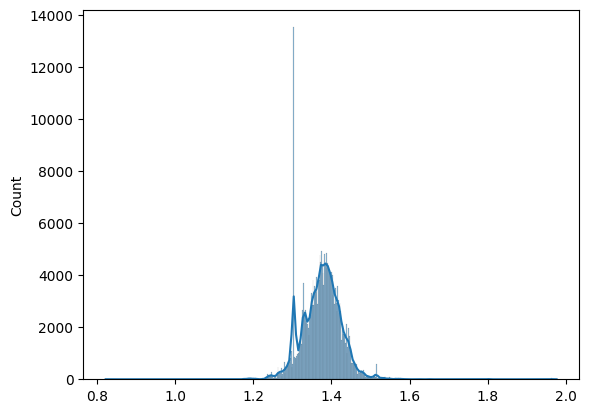

In [16]:
bond_lens = np.array(bond_len_list)
sns.histplot(bond_lens, kde=True)

In [18]:
np.mean(bond_lens)

1.3752147172916722